# Cross Sales Classification

## Data Exploration

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='whitegrid')
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [102]:
df = pd.read_csv('model.csv')

In [103]:
df.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0


In [104]:
df = df.drop(['id'],axis=1)

In [105]:
df[['Age','Annual_Premium','Policy_Sales_Channel','Seniority']].describe()

,Age,Annual_Premium,Policy_Sales_Channel,Seniority
count,102351.000000,102351.000000,102351.000000,102351.000000
mean,39.867339,30748.636398,107.407900,154.527030
std,14.935793,17544.726810,55.327295,83.735221
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24435.500000,26.000000,82.000000
50%,39.000000,31943.000000,124.000000,155.000000
75%,50.000000,39774.000000,152.000000,227.000000
max,85.000000,540165.000000,163.000000,299.000000


In [106]:
df.isna().sum()

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

### Gender

In [107]:
df['Gender'].value_counts()

Male      57097
Female    45254
Name: Gender, dtype: int64

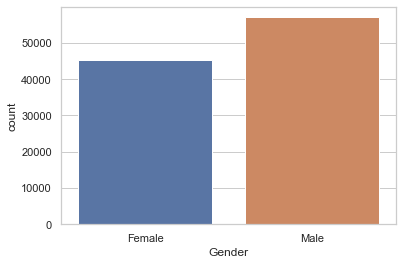

In [108]:
box = sns.countplot(x = 'Gender', data = df )

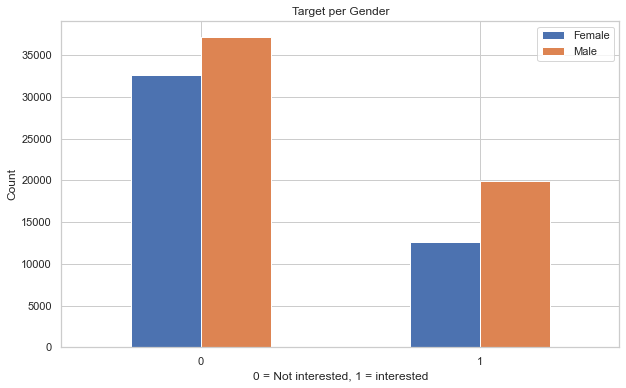

In [109]:
pd.crosstab(df['Target'], df['Gender']).plot(kind="bar", figsize=(10,6))

plt.title("Target per Gender")
plt.xlabel("0 = Not interested, 1 = interested")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age

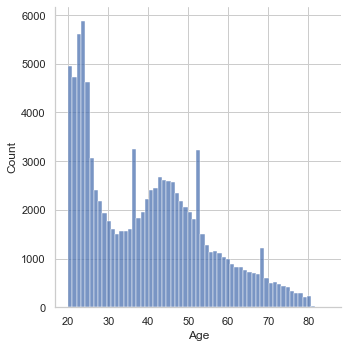

In [110]:
plot = sns.displot(x='Age',data = df)

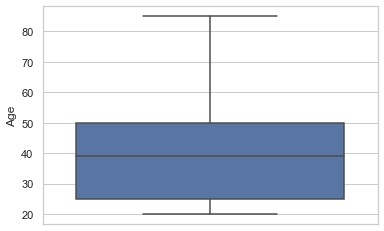

In [111]:
box = sns.boxplot(y = 'Age', data = df ).plot()

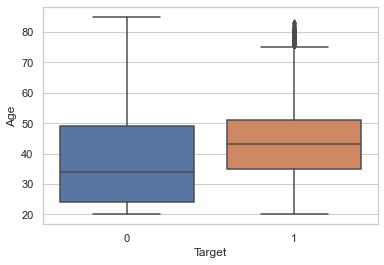

In [112]:
box = sns.boxplot(y = 'Age', x= 'Target', data = df)

### Driving Licence

In [113]:
df['Driving_License'].value_counts()


1    97260
0     5091
Name: Driving_License, dtype: int64

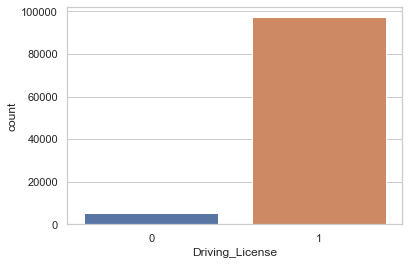

In [114]:
box = sns.countplot(x = 'Driving_License', data = df)

In [115]:
pd.crosstab(df['Driving_License'],df['Target'])

Target,0,1
Driving_License,,
0,3477,1614
1,66401,30859


In [116]:
df['Licence_Type'].value_counts()

C    19835
M    19686
D    19566
B    19306
A    18867
Name: Licence_Type, dtype: int64

### Region Code

Text(0, 0.5, 'Count')

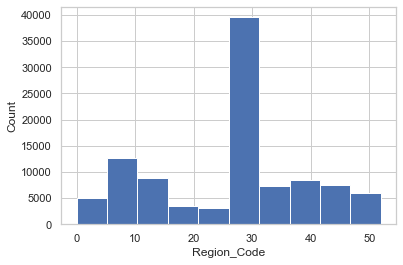

In [117]:
df['Region_Code'].plot(kind = 'hist')
plt.xlabel('Region_Code')
plt.ylabel('Count')

### Previously insured

In [118]:
df['Previously_Insured'].value_counts()

No     65818
Yes    36533
Name: Previously_Insured, dtype: int64

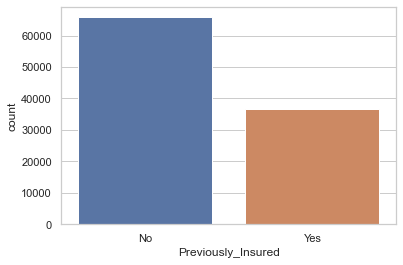

In [119]:
box = sns.countplot(x='Previously_Insured', data =df).plot

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

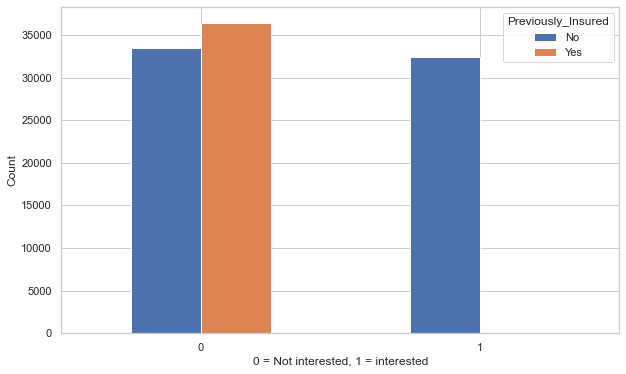

In [120]:
pd.crosstab(df['Target'],df['Previously_Insured']).plot(kind = 'bar', figsize = (10,6))
plt.xlabel("0 = Not interested, 1 = interested")
plt.ylabel('Count')
plt.xticks(rotation=0)

### Vehicle Age

In [121]:
df['Target'].value_counts()

0    69878
1    32473
Name: Target, dtype: int64

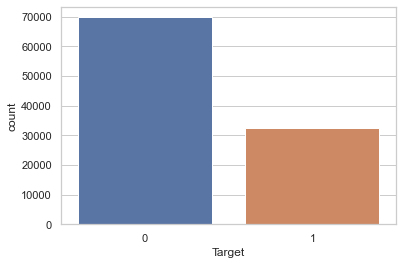

In [122]:
box = sns.countplot(x='Target', data = df)

# Classification

## Data Preprocesign

In [123]:
import pandas as pd

df = pd.read_csv('model.csv')
df.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0


### Dummies

In [124]:
df['Gender'] = pd.Categorical(df['Gender'])
df['Previously_Insured'] = pd.Categorical(df['Previously_Insured'])
df['Vehicle_Age'] = pd.Categorical(df['Vehicle_Age'])
df['Vehicle_Damage'] = pd.Categorical(df['Vehicle_Damage'])
df['Region_Code'] = pd.Categorical(df['Region_Code'])
df['Driving_License'] = pd.Categorical(df['Driving_License'])


df = pd.concat([df[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Seniority', 'Target']],
           pd.get_dummies(df[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Driving_License']])], axis=1)

In [125]:
df.head()

,Age,Annual_Premium,Policy_Sales_Channel,Seniority,Target,Gender_Female,Gender_Male,Previously_Insured_No,Previously_Insured_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,44,25741,154,152,0,1,0,1,0,1,0,0,0,1,0,1
1,23,2630,152,256,0,0,1,0,1,0,1,0,1,0,0,1
2,43,70720,52,224,0,0,1,1,0,1,0,0,0,1,0,1
3,60,48512,26,86,0,0,1,0,1,1,0,0,1,0,0,1
4,42,32169,124,132,0,1,0,1,0,1,0,0,0,1,0,1


### Scaling

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
print(df_scaled.head())

        Age  Annual_Premium  Policy_Sales_Channel  Seniority    Target  \
0  0.276696       -0.285423              0.842122  -0.030179 -0.681696   
1 -1.129329       -1.602691              0.805973   1.211837 -0.681696   
2  0.209743        2.278266             -1.001462   0.829678 -0.681696   
3  1.347954        1.012467             -1.471395  -0.818382 -0.681696   
4  0.142789        0.080957              0.299891  -0.269028 -0.681696   

   Gender_Female  Gender_Male  Previously_Insured_No  Previously_Insured_Yes  \
0       1.123254    -1.123254               0.745024               -0.745024   
1      -0.890270     0.890270              -1.342238                1.342238   
2      -0.890270     0.890270               0.745024               -0.745024   
3      -0.890270     0.890270              -1.342238                1.342238   
4       1.123254    -1.123254               0.745024               -0.745024   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0 

In [127]:
#Train and Test Set

X =  df_scaled.drop(["Target"], axis = 1)
y = df['Target']

#X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [128]:
#Train and Test Split

from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.20, shuffle = False
                                                   ) 
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(81880, 15) (81880,) (20471, 15) (20471,)


In [129]:
X_train.head()

,Age,Annual_Premium,Policy_Sales_Channel,Seniority,Gender_Female,Gender_Male,Previously_Insured_No,Previously_Insured_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,0.276696,-0.285423,0.842122,-0.030179,1.123254,-1.123254,0.745024,-0.745024,0.859535,-0.766471,-0.240834,-0.797754,0.797754,-0.228789,0.228789
1,-1.129329,-1.602691,0.805973,1.211837,-0.890270,0.890270,-1.342238,1.342238,-1.163420,1.304682,-0.240834,1.253519,-1.253519,-0.228789,0.228789
2,0.209743,2.278266,-1.001462,0.829678,-0.890270,0.890270,0.745024,-0.745024,0.859535,-0.766471,-0.240834,-0.797754,0.797754,-0.228789,0.228789
3,1.347954,1.012467,-1.471395,-0.818382,-0.890270,0.890270,-1.342238,1.342238,0.859535,-0.766471,-0.240834,1.253519,-1.253519,-0.228789,0.228789
4,0.142789,0.080957,0.299891,-0.269028,1.123254,-1.123254,0.745024,-0.745024,0.859535,-0.766471,-0.240834,-0.797754,0.797754,-0.228789,0.228789


## Models and Evaluation

### Naive Bayes

In [130]:
#%% Naive Bayes model and metrics 

from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.59      0.74     14045
           1       0.52      0.98      0.68      6426

    accuracy                           0.71     20471
   macro avg       0.75      0.78      0.71     20471
weighted avg       0.84      0.71      0.72     20471

[[8257 5788]
 [ 152 6274]]


<AxesSubplot:>

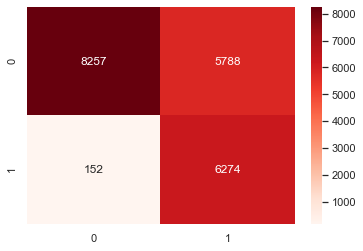

In [131]:
#%% Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

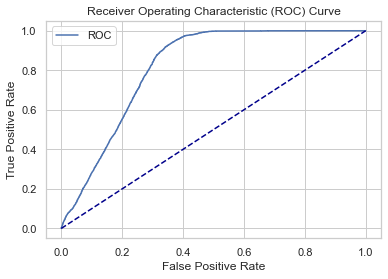

AUC: 0.82


In [132]:
#%% ROC Curve

y_probs = model.predict_proba(X_test)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 10, weights = 'distance', n_jobs = 5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     14045
           1       0.58      0.61      0.60      6426

    accuracy                           0.74     20471
   macro avg       0.70      0.71      0.70     20471
weighted avg       0.74      0.74      0.74     20471

[[11183  2862]
 [ 2479  3947]]


<AxesSubplot:>

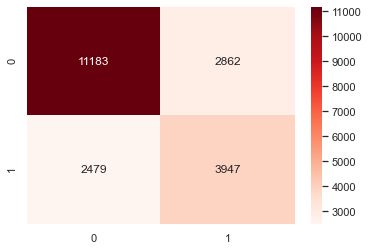

In [134]:
#%% Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

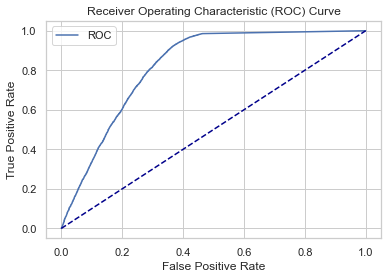

AUC: 0.82


In [135]:
#%% ROC Curve

y_probs = model.predict_proba(X_test)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Classification Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.68      0.79     14045
           1       0.56      0.89      0.69      6426

    accuracy                           0.75     20471
   macro avg       0.75      0.79      0.74     20471
weighted avg       0.81      0.75      0.76     20471

[[9599 4446]
 [ 729 5697]]


<AxesSubplot:>

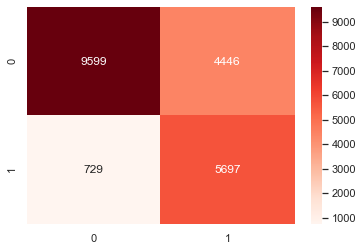

In [137]:
#%% Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

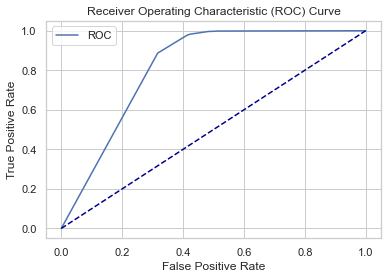

AUC: 0.82


In [138]:
#%% ROC Curve

y_probs = model.predict_proba(X_test)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)